# Part I - (Ford GO BIKE)
## by Khalil MISBAH

## Introduction
This article examines a dataset that includes roughly 183,412 trips from a Ford GoBike. This data collection contains details on each ride taken in a bike-sharing programme that serves the greater San Francisco Bay area.

Regular subscribers are know to be the most secure revenue source for any business, thus I'll try to find some insights that could help the bike service provider to enhance the customer experience as well as make grow the number of subscribers.
In this Notebook, I will try to investigate mostly the following questions:

   - What is the age distribution of the customers using the bike service?
   - What is the age distribution of the daily and hourly duration for customers trips?
   - What is the proportion of regular vs non subscribers?
   - Does subscription have any impact on using the ride sharing option?
    



## Table of Content:
   * [Preliminary Wrangling](#pre-wrangle)
   * [What is the structure of your dataset?](#dataset-structure)
   * [What is/are the main feature(s) of interest in your dataset?](#feature-selection)
   * [Univariate Exploration](#univariate-exploration)
   * [Bivariate Exploration](#bivariate-exploration)
   * [Multivariate Exploration](#multivariate-exploration)
   * [Conclusions](#conclusion)

## Preliminary Wrangling <a class='anchor' id ='pre-wrangle'></a>


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
#loading the csv file into df_pisa dataframe
ford = pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
ford.head(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No
6,1147,2019-02-28 23:55:35.1040,2019-03-01 00:14:42.5880,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983.0,Female,No
7,1615,2019-02-28 23:41:06.7660,2019-03-01 00:08:02.7560,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6329,Subscriber,1989.0,Male,No
8,1570,2019-02-28 23:41:48.7900,2019-03-01 00:07:59.7150,10.0,Washington St at Kearny St,37.795393,-122.404770,127.0,Valencia St at 21st St,37.756708,-122.421025,6548,Subscriber,1988.0,Other,No
9,1049,2019-02-28 23:49:47.6990,2019-03-01 00:07:17.0250,19.0,Post St at Kearny St,37.788975,-122.403452,121.0,Mission Playground,37.759210,-122.421339,6488,Subscriber,1992.0,Male,No


In [4]:
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [5]:
ford[ford.isnull().any(axis = 1)]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290231,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183354,449,2019-02-01 01:35:07.6630,2019-02-01 01:42:36.8780,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,253.0,Haste St at College Ave,37.866418,-122.253799,5430,Customer,NaN,NaN,No
183356,795,2019-02-01 01:25:50.3660,2019-02-01 01:39:05.9500,368.0,Myrtle St at Polk St,37.785434,-122.419622,125.0,20th St at Bryant St,37.759200,-122.409851,5400,Subscriber,NaN,NaN,No
183363,673,2019-02-01 01:12:24.4200,2019-02-01 01:23:37.6450,75.0,Market St at Franklin St,37.773793,-122.421239,133.0,Valencia St at 22nd St,37.755213,-122.420975,5166,Customer,NaN,NaN,No
183371,196,2019-02-01 01:08:38.6410,2019-02-01 01:11:54.9490,58.0,Market St at 10th St,37.776619,-122.417385,75.0,Market St at Franklin St,37.773793,-122.421239,2395,Customer,NaN,NaN,No


> More than 8400 missing data exists in this dataset. Since wrangling is not the main purpose of this project and the number missing data is low as regarding to the total number of rows, I would clone the original dataset and eliminate the rows with missing values.

## Cleaning Data
### Define
We will create a duplicate of the dataset and remove all missing values.
### Code

In [6]:
df = ford.copy()
df = df.dropna()
sum(df.isnull().any())

0

### Test

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             174952 non-null  int64  
 1   start_time               174952 non-null  object 
 2   end_time                 174952 non-null  object 
 3   start_station_id         174952 non-null  float64
 4   start_station_name       174952 non-null  object 
 5   start_station_latitude   174952 non-null  float64
 6   start_station_longitude  174952 non-null  float64
 7   end_station_id           174952 non-null  float64
 8   end_station_name         174952 non-null  object 
 9   end_station_latitude     174952 non-null  float64
 10  end_station_longitude    174952 non-null  float64
 11  bike_id                  174952 non-null  int64  
 12  user_type                174952 non-null  object 
 13  member_birth_year        174952 non-null  float64
 14  memb

> I've done what it takes here to set appropriate data type for some of my colmns here (e.g., start_time, start_station_id..)

### Define
- Correct datatypes for start_time and end_time
- Set user_type, member_gender, bike_share_for_all_trip Datatype to category
- Set start_station_id, end_station_id, bike_id Datatype to string

### Code

In [8]:
df[['start_time','end_time']] = df[['start_time','end_time']].astype('datetime64[ns]')
df[['user_type', 'member_gender', 'bike_share_for_all_trip']] = df[['user_type', 'member_gender', 'bike_share_for_all_trip']].astype('category')
df[['start_station_id','end_station_id', 'bike_id']] = df[['start_station_id','end_station_id', 'bike_id']].astype(str)

### Test

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

## Feature Engineering
### Define
- Creating a new features aiming to convert trip duration to minutes count, split start-trip-date into hour of the day and day of the week for deeper insights called hour-of-day and day_of_week

### Code

In [10]:
df['duration_min'] = df['duration_sec']/60
df['hour'] = df.start_time.dt.hour.astype(str)
df['day_of_week'] = df.start_time.dt.strftime('%A')
df['date'] = pd.to_datetime(df.start_time.dt.date)

In [11]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_type = pd.api.types.CategoricalDtype(ordered = True, categories = days)
df['day_of_week'] = df.day_of_week.astype(day_type)

In [12]:
hours = ['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23']
hour_type = pd.api.types.CategoricalDtype(ordered = True, categories = hours)
df['hour-of-day'] = df.hour.astype(hour_type)

### Define
- Creating a new features called member-age to use instead of member-birth-year

### Code

In [13]:
import datetime
today = datetime.date.today()
year = today.year
df['member_age'] = year - df['member_birth_year'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 22 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  float64       
 6   start_station_longitude  174952 non-null  float64       
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  float64       
 10  end_station_longitude    174952 non-null  float64       
 11  bike_id                  174952 non-null  object        
 12  user_type       

### What is the structure of your dataset?

> This project will make use of a dataset of 174952 records and 15 columns.
> - It has information about the trip, like when it starts and when it ends.
> - It holds various information on the bike's user, including member gender and user type 
> - It also includes information regarding the station, some of which include the start_station_name, start_station_id, the start_station_longitude...;
> - And has numerous columns with categorical datatypes, named bike_share_for_all_trip for instance, with which a number of explorations and conclusions will be drawn.


### What is/are the main feature(s) of interest in your dataset?

> The features of interest include, but are not limited to, the type of user, the peak usage hours, the time of day that bikes leave the stations, and the frequency with which bikes depart and return to stations.;

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Features like the type, gender, and age of the members, the duration of the travels, and the most frequent trips and destinations would enhance my inquiry.

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


###  Question #1
 > How frequently did each gender ride bicycles?

### Visualization

<AxesSubplot:xlabel='member_gender', ylabel='count'>

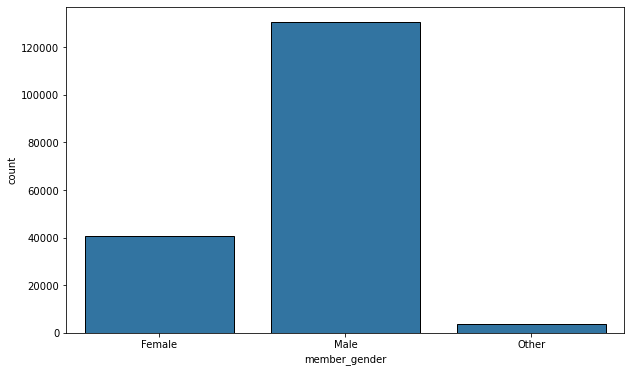

In [15]:
plt.figure(figsize=(10,6))
sb.countplot(data = df, x = 'member_gender', color = sb.color_palette()[0], edgecolor='black')

### Observations
> It's easy to observe that males outnumber by far females who rode bicycles.

 ###  Question #2
 > What is the distribution of the age of the riders?

### Visualization

Text(0, 0.5, 'Counts')

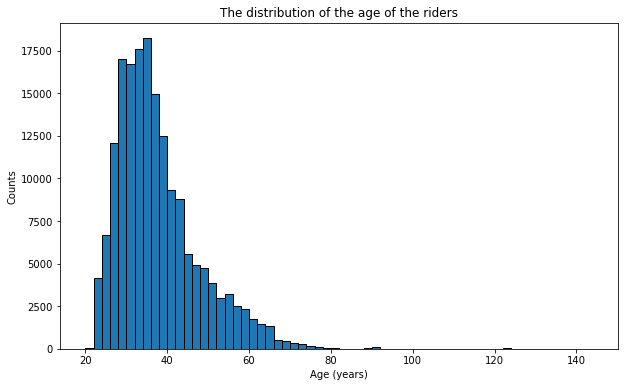

In [16]:
bins=np.arange(20, df.member_age.max()+2, 2)
    
#set the plot parameters
plt.figure(figsize=(10,6))

plt.hist(data=df, x='member_age', edgecolor='black', bins = bins);
plt.title("The distribution of the age of the riders")
plt.xlabel("Age (years)")
plt.ylabel("Counts")

#### Observation
>Having riders older than 80 years old is atypical, therefore I may look into making a tweak to this by limiting the age limit.

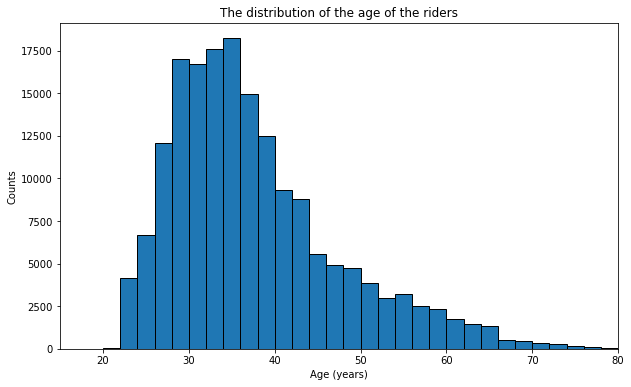

In [17]:
plt.figure(figsize=(10,6))
plt.hist(data=df, x='member_age', edgecolor='black', bins = bins);
plt.title("The distribution of the age of the riders")
plt.xlabel("Age (years)")
plt.ylabel("Counts")
plt.xlim([15,80]);

 ###  Question #3
 > Can we tell which day of the week has the highest bike usage across the group?

### Visualization

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

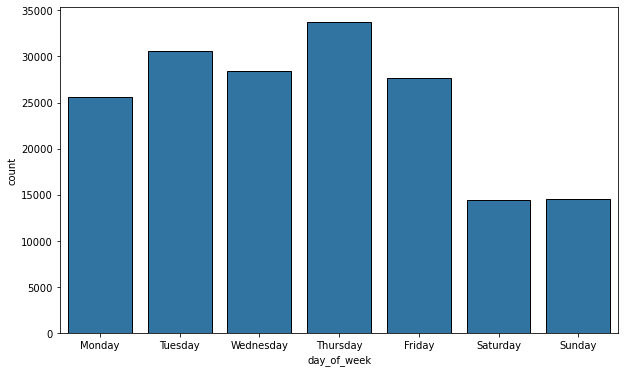

In [18]:
plt.figure(figsize=(10,6))
sb.countplot(data = df, x = 'day_of_week', color = sb.color_palette()[0],edgecolor='black')

### Observations
> The graphic above clearly shows that weekend days have the fewest bike journeys, whereas the "working days" get often more demand for the bike riding service.

###  Question #4
 > Can we tell which hour of the day has the highest bike usage across the group?

### Visualization

<AxesSubplot:xlabel='hour-of-day', ylabel='count'>

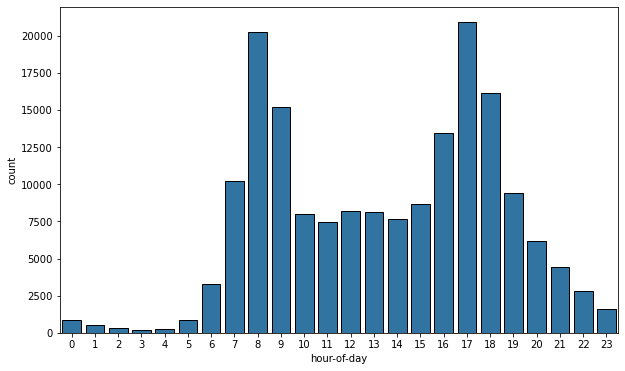

In [19]:
plt.figure(figsize=(10,6))
sb.countplot(data = df, x = 'hour-of-day', color = sb.color_palette()[0],edgecolor='black')

### Observations
> Two rush periods appear in the plot; the first at 8 a.m while the second is at 5 p.m.
this usage pattern could hipothetically be tied to working habits of people, as most of the people would usually go in and out of work at these hours.
Obviously, though, such conclusions would require extra evidence to be valid. 

### Question #5
What is the proportion of customers sharing rides on trips.

In [20]:
share_trip_counts = df['bike_share_for_all_trip'].value_counts()

### Visualization

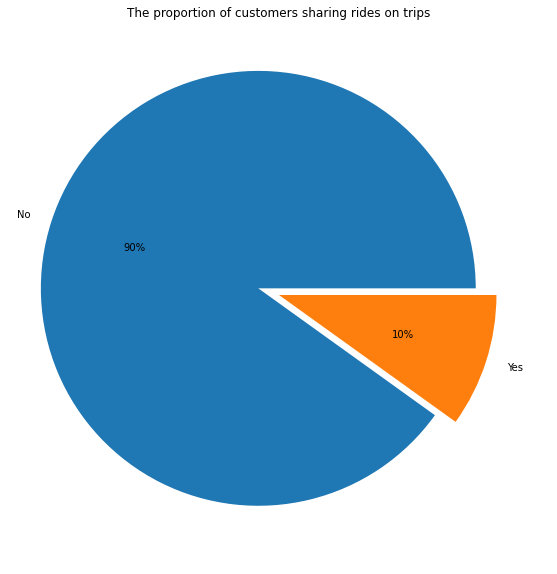

In [21]:
explode = (0.1, 0)
plt.figure(figsize=(10,10))
plt.pie(df['bike_share_for_all_trip'].value_counts(),
        labels = share_trip_counts.index
        , autopct='%1.0f%%', explode = explode)
plt.title("The proportion of customers sharing rides on trips");

### Observation
While some customers did opt to share bikes at this time, the vast majority did not.

###  Question #6
 > What is the distribution of time spent on a trip?

### Visualization

In [22]:
df.duration_min.describe()

count    174952.000000
mean         11.733379
std          27.370082
min           1.016667
25%           5.383333
50%           8.500000
75%          13.150000
max        1409.133333
Name: duration_min, dtype: float64

Text(0.5, 0, 'Duration (min)')

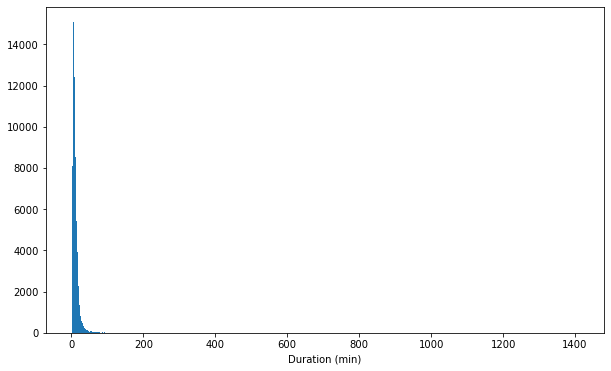

In [23]:
bins= np.arange(0, df.duration_min.max()+1, 1)
plt.figure(figsize=[10,6])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xlabel('Duration (min)')

>As the average trip is about 12 minutes, a trip of over 1400 mins is absolutely an outlier here. Adding the fact that the distribution is skewed to the right, I will try to adjust the plotby setting a limit to x axis a scalle it by a log of 10. 

In [24]:
np.log10(df.duration_min).describe()

count    174952.000000
mean          0.929673
std           0.305190
min           0.007179
25%           0.731051
50%           0.929419
75%           1.118926
max           3.148952
Name: duration_min, dtype: float64

Text(0.5, 0, 'Duration (min)')

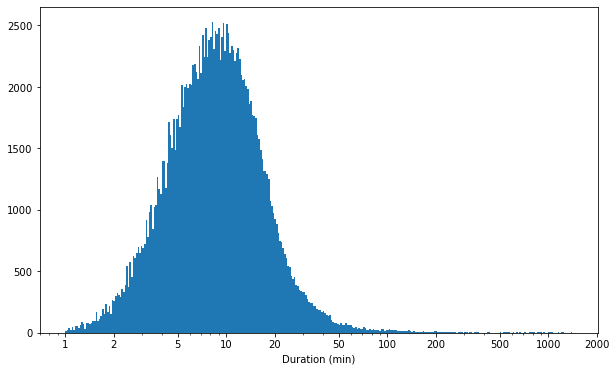

In [25]:
bins=10 ** np.arange(0, 3.15 + 0.01, 0.01)
ticks = [1,2,5,10,20,50,100,200,500,1000,2000]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=[10,6])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlabel('Duration (min)')

Text(0, 0.5, 'Count')

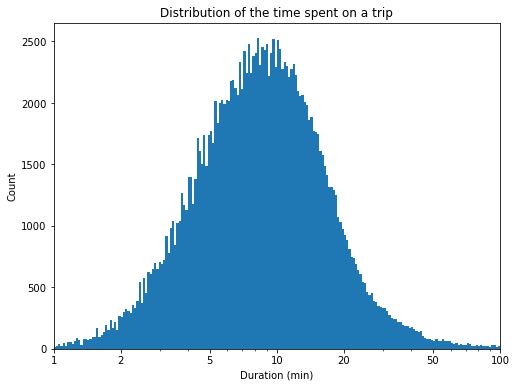

In [26]:
bins=10 ** np.arange(0, 3.15 + 0.01, 0.01)
ticks = [1,2,5,10,20,50,100,200,500,1000,2000]
labels = ['{}'.format(v) for v in ticks]
plt.figure(figsize=[8,6])
plt.hist(data=df, x='duration_min', bins=bins)
plt.xscale('log')
plt.xticks(ticks, labels)
plt.xlim([1,100])
plt.title('Distribution of the time spent on a trip')
plt.xlabel('Duration (min)')
plt.ylabel('Count')

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Most variables i ploted seemed to follow normal trends, especially the plot depicting which hour of the day with the highest bike usage. The resulting bimodal distribution holds a highly strong explanation about the purposes behind these kind of rides.
Although there may be some outliers in the client age distribution, this is not a deal breaker. I tried to adjust for this by tightening the bounds on the age range shown in the plot, and the result is clearly a right-skewed distribution. The same graph also reveals that between the ages of 25 and 40, this group has the most representation.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Given that the typical journey takes less than 13 minutes, a journey of more than 1400 min is clearly abnormal. Due to the right-skewed nature of the data, I will attempt to modify the plot by placing a restriction on the x-axis and increasing the scale by a factor of 10.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

In [27]:
"""
Create a log10 transformation for an array.
:y: an nd-array  
"""
def log_transformation(y):
    return(np.log10(y))

###  Question #7
 > Is there a correlation between the member age and the day of the week on which they went on their bicycle tour?

### Visualization

Text(0.5, 1.0, 'Relationship between the member age and the day of the bicycle tour')

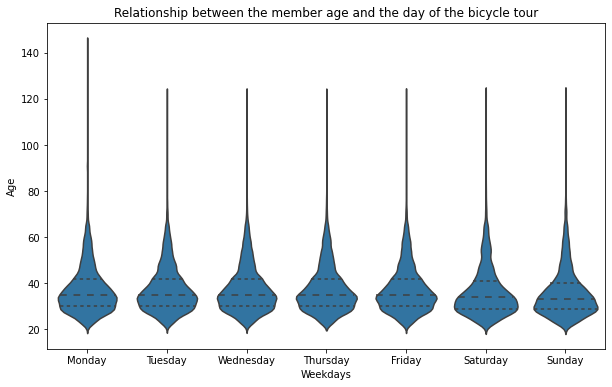

In [28]:
plt.figure(figsize= (10,6))
sb.violinplot(data = df, x = 'day_of_week', y = 'member_age', color = sb.color_palette()[0], inner = 'quartile', showfliers = False)
plt.xlabel('Weekdays')
plt.ylabel('Age')
plt.title('Relationship between the member age and the day of the bicycle tour')

In [29]:
set(df['day_of_week'])

{'Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'}

### Observation
> I noticed that the weekday charts seem remarkably similar, and that the quartiles, which necessarily include outliers, do as well. Based on this, I believe that the majority of individuals who use the bike route are paying subscribers who utilise it on a daily basis. Also, most people who take this method do so since it is the only direct route to and from their work place.

###  Question #8
 > Is there any link between the duration of the bicycle trip and the day of the week it was taken?

### Visualization

Text(0.5, 1.0, 'Relationship between the duration of the bicycle trip and the day of the week it was taken')

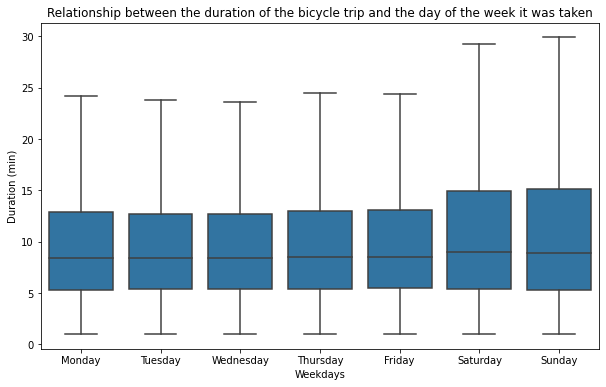

In [30]:
plt.figure(figsize= (10,6))
sb.boxplot(data = df, x = 'day_of_week', y = 'duration_min', color = sb.color_palette()[0], showfliers = False)
plt.xlabel('Weekdays')
plt.ylabel('Duration (min)')
plt.title('Relationship between the duration of the bicycle trip and the day of the week it was taken')

### Observation
>There is a striking resemblance in the relationship between the ages of the members and the days of the week on which they used the trip, except for a tiny increase occuring in the course of the weekend. 

### Question #9
>What is the relationship between the duration of the trip and the bike sharing option?

### Visualization

Text(0.5, 1.0, 'Relationship between the duration of the trip and the bike sharing option')

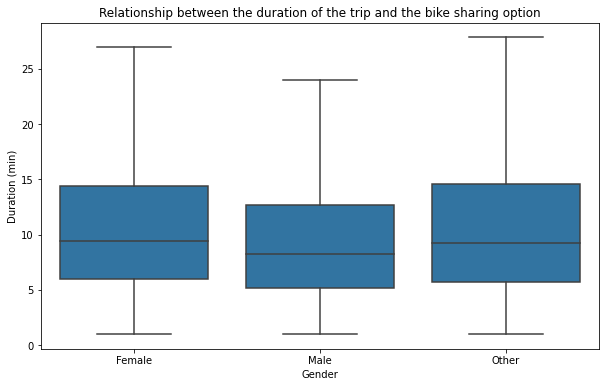

In [31]:
plt.figure(figsize= (10,6))
sb.boxplot(data=df, x= 'member_gender', y= 'duration_min', color= sb.color_palette()[0], showfliers=False)
plt.xlabel('Gender')
plt.ylabel('Duration (min)')
plt.title('Relationship between the duration of the trip and the bike sharing option')

### Observation
> In general, compared to male members, female and other gender members do longer bike trips.

### Question #10
> How does a member's age affect the choice of sharing trips?

### Visualization

'member_age'

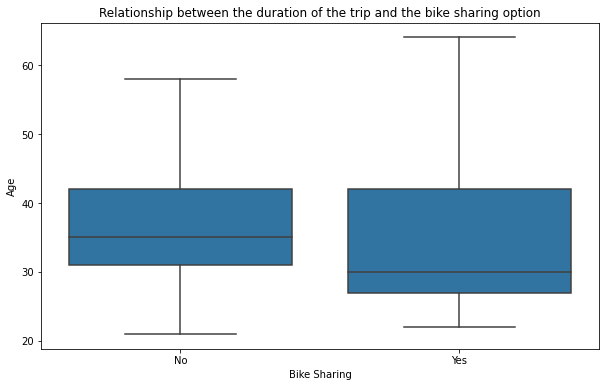

In [32]:
plt.figure(figsize= (10,6))
sb.boxplot(data=df, x= 'bike_share_for_all_trip', y= 'member_age', color= sb.color_palette()[0], showfliers=False)
plt.xlabel('Bike Sharing')
plt.ylabel('Age')
plt.title('Relationship between the duration of the trip and the bike sharing option')
'member_age'

### Observation
> Compared to trips without bike sharing, those with bike sharing have a higher proportion of older users.

### Question #11
> How does a member's age affect the length of their trips?

### Visualization

In [33]:
np.log10(df.duration_min).describe()

count    174952.000000
mean          0.929673
std           0.305190
min           0.007179
25%           0.731051
50%           0.929419
75%           1.118926
max           3.148952
Name: duration_min, dtype: float64

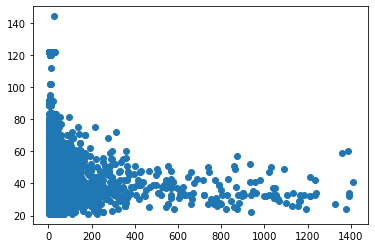

In [34]:
plt.scatter(data = df, x= 'duration_min', y = 'member_age')

Text(0, 0.5, 'Duration in log(min)')

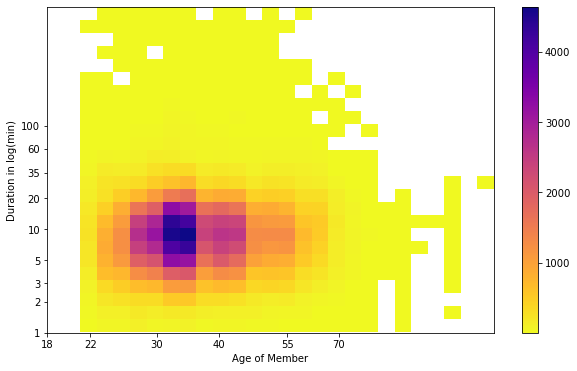

In [35]:
plt.figure(figsize = (10,6))
plt.hist2d(data = df, y = df['duration_min'].apply(log_transformation), 
           x = df['member_age'].apply(log_transformation), 
           cmap = 'plasma_r', cmin= 0.5, bins = 25)
plt.colorbar()
xticks = [18, 22, 30, 40, 55, 70]
yticks = [1, 2, 3, 5, 10, 20,35, 60, 100]
plt.xticks(log_transformation(xticks), xticks)
plt.yticks(log_transformation(yticks), yticks)
plt.xlabel('Age of Member')
plt.ylabel('Duration in log(min)')

### Observation
> From this plot, we can infer that the strongest connections are centred in a 5- and 20-minute time window, and between 25 and 35 years of age. 

###  Question #10
 > What is the relationship between the type of user that used the bike trips, the start hour of the trips and the days of the week?

### Visualization

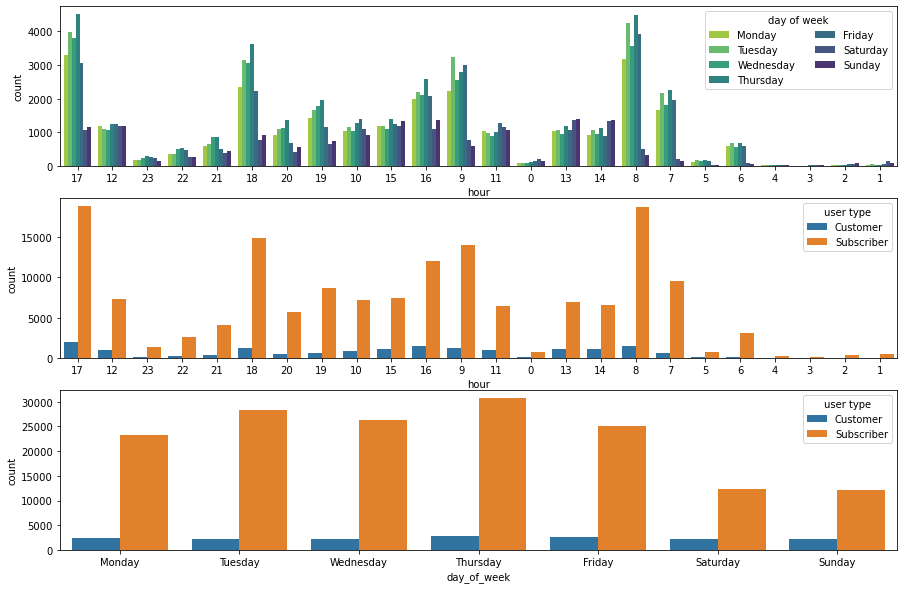

In [36]:
fig, ax = plt.subplots(nrows=3, figsize=[15,10])
sb.countplot(data=df, x='hour', hue='day_of_week', palette='viridis_r', ax=ax[0])
ax[0].legend(title='day of week', ncol=2)
sb.countplot(data=df, x='hour', hue='user_type', ax=ax[1])
ax[1].legend(title='user type')
sb.countplot(data=df, x='day_of_week', hue='user_type', ax=ax[2])
ax[2].legend(title='user type')

### Observation

> The highest bike trips started at 8am and 5pm, and this mainly peaked on Thursday.

> Overall, weekdays have higher number of trips than weekends except two time frames:
(1) 10 AM — 3 PM (the usual office hours) in which both have approx. same number of trips.
(2) 12 midnight to 2 AM in which weekends have more trips than weekdays.

>With this plot, I think my suspicion is somewhat correct, that bike trips were mainly used by the office workers, and most of them are subscribers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> A foremost induction is that there is no linear link between the members' ages and the length of their travels.

> Trips duration during the week days tend to be shorter than those who use them on weekends.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Females and members of other genders had lengthier bike excursions on average than male members.

> Trips including bike sharing have a higher proportion of elderly adults than those that do not. 

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

### Question #12
> Let's find out how the trip's duration, the days of the week, and the user type relate to one another.

### Visualization

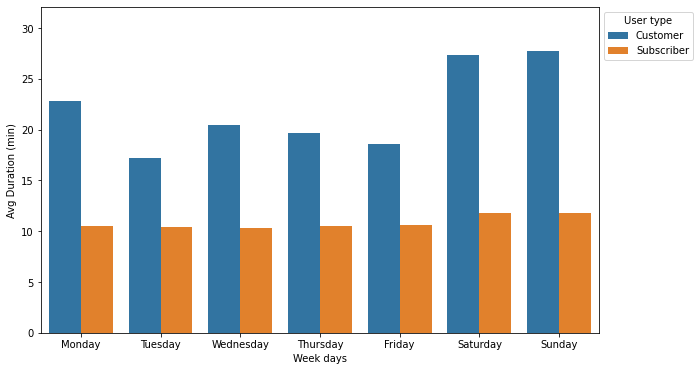

In [37]:
plt.figure(figsize = (10,6))
sb.barplot(data=df, x='day_of_week', y='duration_min', hue='user_type', errwidth=0)
plt.xlabel('Week days')
plt.ylabel('Avg Duration (min)')
plt.legend(loc=2, title='User type', bbox_to_anchor=(1,1))

### Observation
> It is observed from this plot that the weekends is when non subscriber customers are most likely to use the bike tours, with an extra duration of a journey of about 7 minutes.

### Question #13
> Let's investigate the connection between the number of hours, the trip's duration, and the user type.

### Visualization

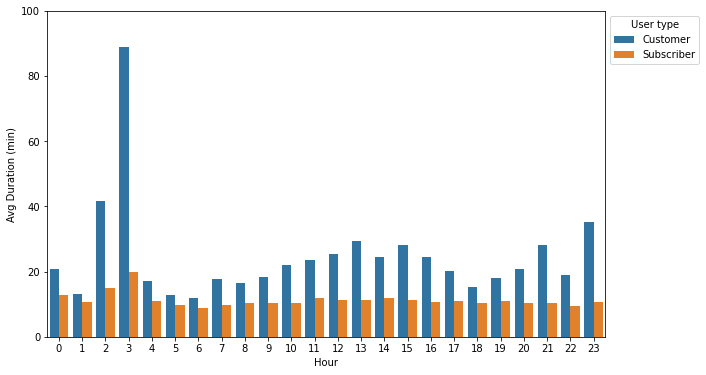

In [38]:
plt.figure(figsize = (10,6))
sb.barplot(data=df, x='hour-of-day', y='duration_min', hue='user_type', errwidth=0)
plt.ylim([0,100])
plt.xlabel('Hour')
plt.ylabel('Avg Duration (min)')
plt.legend(loc=2, title='User type', bbox_to_anchor=(1,1))

### Observation
> Similar to the previous plot, bike trips are most likely to be used by non-subscribers. If we omit the outliers accounting for 2 and 3 am, the longest excursions are often performed by the consumers and they begin around 11 am to 4 pm and between 9 and 11 pm.

### Question 14
> What connection exists between the travelers' ages, the length of their trips, and the Bike sharing option.

### Visualization

<Figure size 720x432 with 0 Axes>

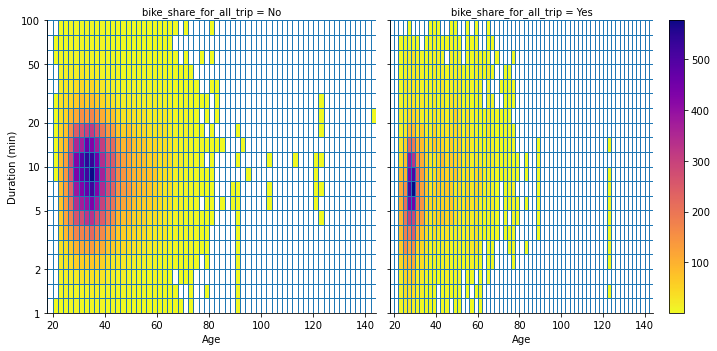

In [39]:
plt.figure(figsize = (10,6))
df['duration_min_log'] = df['duration_min'].apply(np.log10)
x_bins =np.arange(18, df.member_age.max()+2, 2)
y_bins =np.arange(0, 2+0.1, 0.1)
g = sb.FacetGrid(data = df, col = 'bike_share_for_all_trip', col_wrap=3, height=5)
yticks = [1,2,5,10,20,50,100]
g.map(plt.hist2d, 'member_age', 'duration_min_log', bins=[x_bins,y_bins], cmap='plasma_r', cmin = 0.5)
plt.colorbar()
plt.yticks(np.log10(yticks),yticks)
g.set_xlabels('Age')
g.set_ylabels('Duration (min)')

### Observation
> Most bike sharing is by customers in the 20s of their ages for a duration between 5 and 20 minutes.

### Question #15
> Let's investigate how the members' ages, the day of the week, and the user type variables are related.

### Visualization

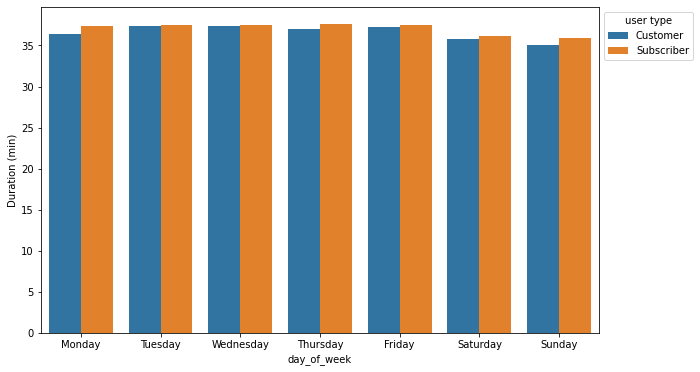

In [40]:
plt.figure(figsize = (10,6))
sb.barplot(data=df, x='day_of_week', y='member_age', hue='user_type', errwidth=0)
plt.ylabel('Duration (min)')
plt.legend(loc=2, title='user type', bbox_to_anchor=(1,1))

### Observation
> In addition to a downward trend over the course of the other days of the week, a steady pattern is obvious in the user types on Tuesday and Wednesday.

In [41]:
df.to_csv('fordgo_bike_tripdata_clean.csv', index = False)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> during the multivariate inquiry of both numerical and categorical variables, I decided to investigate the influence of subscription , and see how age and usage during the rush hours as well as the length of trips are distributed between the two categories.


### Were there any interesting or surprising interactions between features?

> Rather of revealing any new insights between characteristics, the multivariate analysis only served to validate some of the inferences made in the prior section.

## Conclusions
> The dataset and the subsequent analyses have revealed several interesting facts regarding the distribution of bike trips taken within the specified time period.
Explorations of these connections have allowed me to see how seniors prefer their travels; primarily not sharing; how time they spend on trips; not really prolonged; and to answer other considered to make.

> The features of interest include, but are not limited to, the type of user, the peak usage hours, the time of day that bikes leave the stations, and the frequency with which bikes depart and return to stations. The wrangling done during this preliminary investigation was not particularly exhaustive

> Some of the conclusion I was able to highlight during this analysis are the following:
- A population with an age between 25 and 40, has the most representation in this dataset
- Bike trips are most likely to be used by non-subscribers
- The fact that motorcyclists typically do not share bikes when travelling is also noteworthy.
- Trips duration during the week days tend to be shorter than those who use them on weekends.